In [1]:
import os
import json

In [2]:
path_raw_data = "../../data/raw_data"
dict_debats = {}

for list_file in  os.listdir(path_raw_data):
    dict_debats[list_file] = []

    global_path_to_data = path_raw_data + '/' + list_file
    file =  open(global_path_to_data,'r')
    list_lines = file.readlines()

    for line in list_lines:
        data = json.loads(line)
        dict_debats[list_file].append(data["text"])
    
    file.close()


In [ ]:
dict_debats["data_Emmanuel_Macron_Marine_Le_Pen.jsonl"]

In [ ]:
for debat_name, debat_list in dict_debats.items():
    print(debat_name)
    for line in debat_list:
        splited_line = line.split("-")
        if(len(splited_line)>2):
            # print(line)
            print("voici la valeur : ", splited_line[0])
    break

## Cloud Word

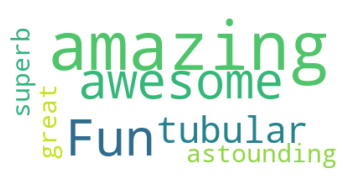

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create some sample text
text = 'Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing'

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# st.pyplot()

### Image-colored wordcloud with boundary map

In [2]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator


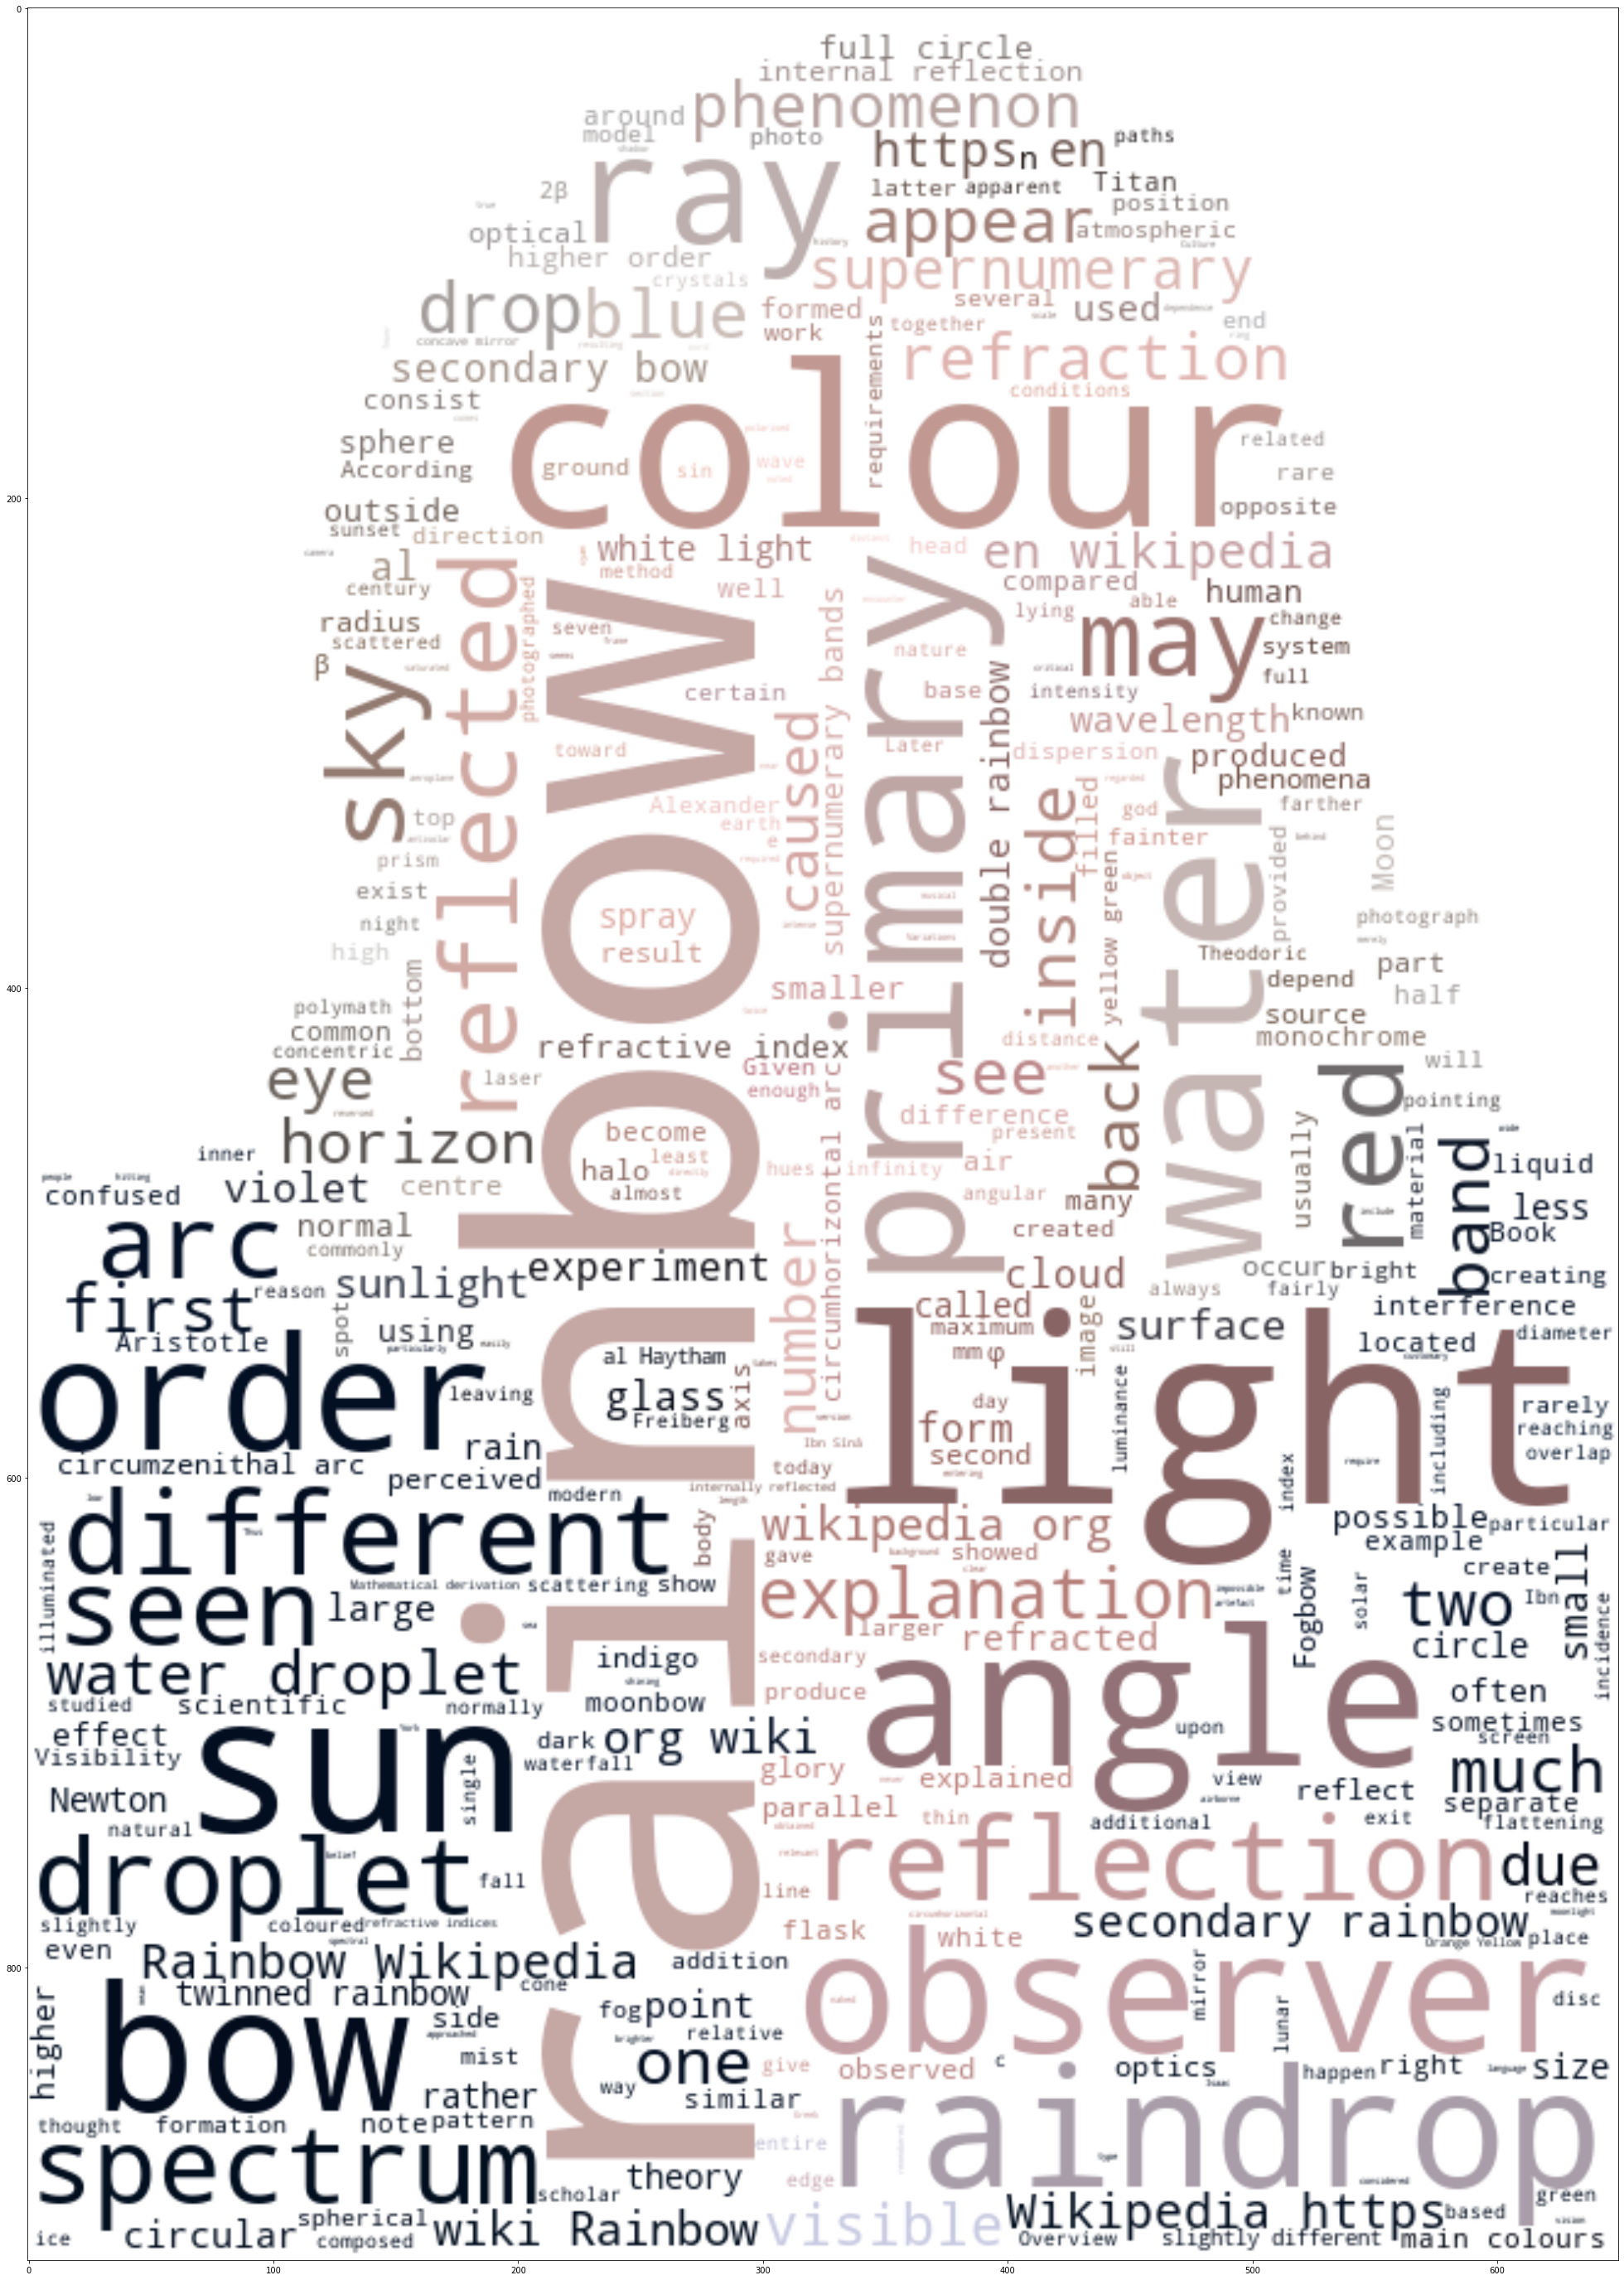

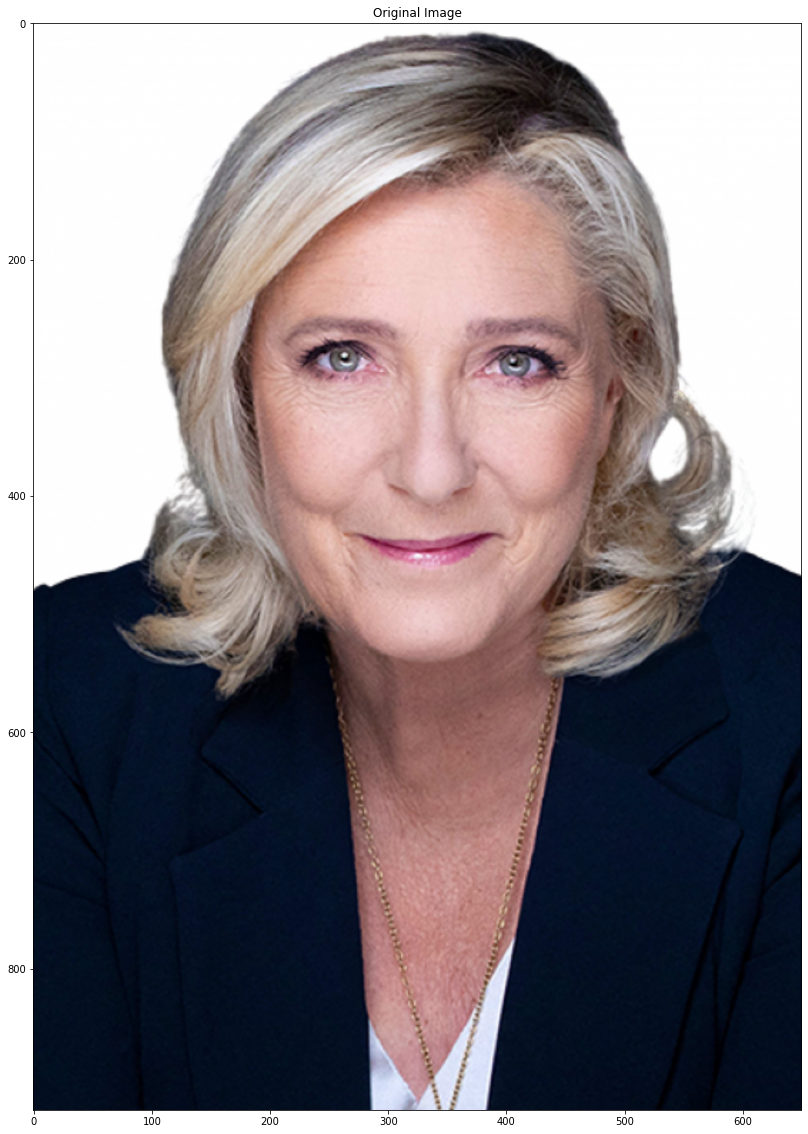

In [12]:
# load wikipedia text on rainbow
text = 'Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing,Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing, Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing'
path_to_image = "../../data/images/"
path_to_text = "../../data/text/"

# load wikipedia text on rainbow
text = open(os.path.join(path_to_text, 'examples_wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
melenchon_color = np.array(Image.open(os.path.join(path_to_image, "lepen.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
# melenchon_color = melenchon_color[::3, ::3]
# create mask  white is "masked out"
melenchon_mask = melenchon_color.copy()
# melenchon_mask[melenchon_mask==0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
# edges = np.mean([gaussian_gradient_magnitude(melenchon_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
# melenchon_mask[edges < 0.003] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=400, mask=melenchon_mask, background_color="white") #, max_font_size=5, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
# plt.figure(figsize=(100, 100))
# plt.imshow(wc)

#create coloring from image
image_colors = ImageColorGenerator(melenchon_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(50, 50))
plt.imshow(wc, interpolation="bilinear")


plt.figure(figsize=(20, 20))
plt.title("Original Image")
plt.imshow(melenchon_mask)

# plt.figure(figsize=(10, 10))
# plt.title("Edge map")
# plt.imshow(edges)
# plt.show()
